In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from columns_to_keep import C2K
from type_to_fix import T2F

In [2]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'datadump-20150801-20171219.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name)
display(df.shape)

(63265, 111)

In [3]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63265 entries, 0 to 63264
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   session_id                        63265 non-null  int64              
 1   tutor_id                          58516 non-null  Int64              
 2   student_id                        63265 non-null  int64              
 3   timestamp                         63265 non-null  datetime64[ns, UTC]
 4   feedback_score                    49277 non-null  float64            
 5   wait_time                         63265 non-null  float64            
 6   ended_by_reason                   63238 non-null  object             
 7   session_category                  63260 non-null  object             
 8   consolidated_session_category     55372 non-null  object             
 9   student_complained                63265 non-null  bool       

Caracterizar a los tutores en términos de edad, sexo y país. Para el caso de la edad, determinar si los datos siguen alguna alguna distribución conocida. Para el sexo, determinar si hay una diferencia significativa entre hombres y mujeres. Graficar.

In [64]:
tutors_profile = df.groupby('tutor_id')[['tutor_age','tutor_gender','tutor_last_sign_in_country']].max()
display(tutors_profile)
display(tutors_profile.describe())

,tutor_age,tutor_gender,tutor_last_sign_in_country
tutor_id,,,
2,52,male,US
6,23,male,IN
10,52,female,USA
12,52,male,IN
18,52,female,BIH
...,...,...,...
680521,20,NaN,PH
694675,19,NaN,US
710855,29,NaN,PH


,tutor_age
count,146.000000
mean,29.191781
std,11.625961
min,15.000000
25%,21.000000
50%,25.000000
75%,32.000000
max,63.000000


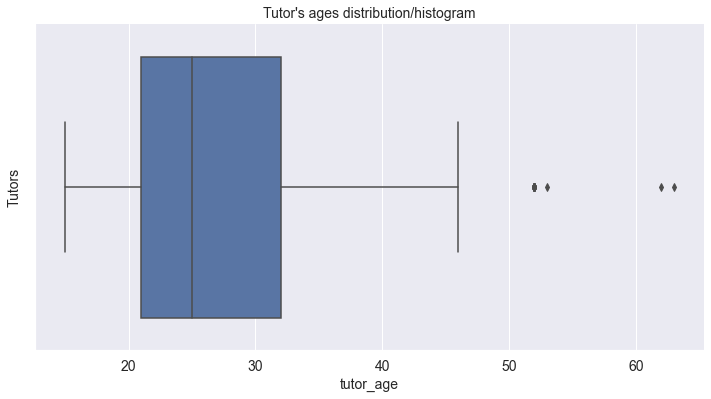

In [139]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.boxplot(x=tutors_profile.tutor_age.dropna())
plt.title("Tutor's ages distribution/histogram", fontsize=14)
plt.xlabel('tutor_age',fontsize=14)
plt.ylabel('Tutors',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

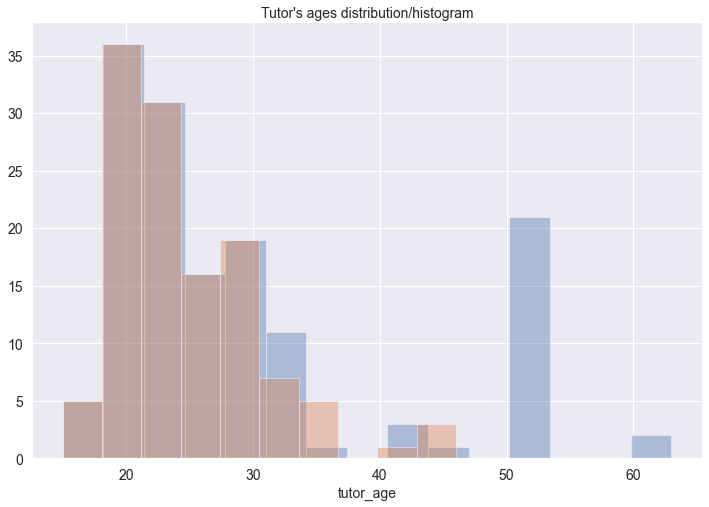

In [140]:
tp_raw = tutors_profile.tutor_age.dropna()
tp_filt = tp_raw[tp_raw<50]


plt.figure(figsize=(12,8))
sns.distplot(tp_raw, bins=15, kde=False)
sns.distplot(tp_filt, bins=10, kde=False)
plt.grid(True)
plt.title("Tutor's ages distribution/histogram", fontsize=14)
plt.xlabel('tutor_age',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
# No se que pdf inferir de aca. El pico ente 50 y 60 me mata.

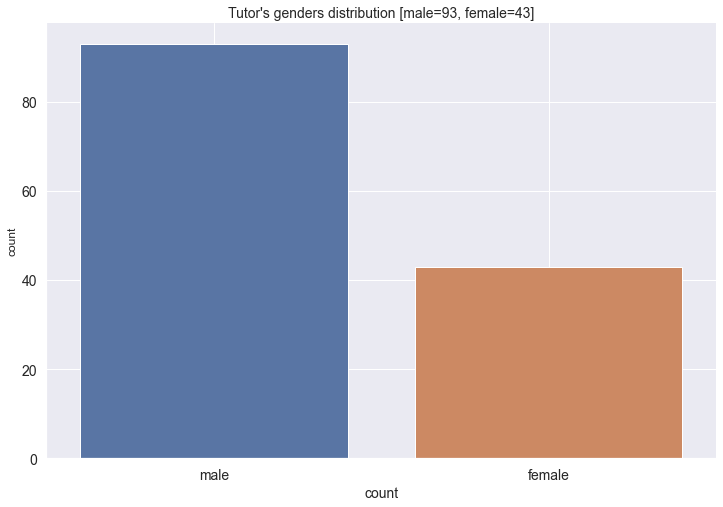

In [153]:
female = tutors_profile[tutors_profile.tutor_gender=='female']['tutor_gender'].count()
male = tutors_profile[tutors_profile.tutor_gender=='male']['tutor_gender'].count()

plt.figure(figsize=(12,8))
sns.countplot(x='tutor_gender', data=tutors_profile)
plt.grid(True)
plt.title(f"Tutor's genders distribution [male={male}, female={female}]", fontsize=14)
plt.xlabel('tutor_gender',fontsize=14)
plt.xlabel('count',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Determinar la cantidad de diálogos del dataset, cantidad de tutores, y cantidad de estudiantes. Determinar cuántos turnos hay del tutor y cuántos del estudiante en total y en promedio por diálogo. Graficar la distribución.

In [170]:
n_sessions = df.session_id.shape[0]
n_tutors = df.tutor_id.unique().shape[0]
n_students = df.student_id.unique().shape[0]
display(f'Número de sesiones {n_sessions}')
display(f'Cantidad de tutores {n_tutors}')
display(f'Cantidad de estudiantes {n_students}')



'Número de sesiones 63265'

'Cantidad de tutores 150'

'Cantidad de estudiantes 16808'

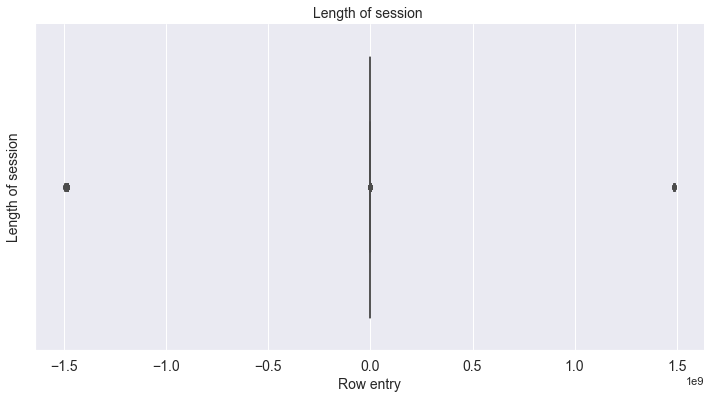

In [206]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=df.length_of_session.dropna())
plt.title("Length of session ", fontsize=14)
plt.xlabel('Row entry',fontsize=14)
plt.ylabel('Length of session',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

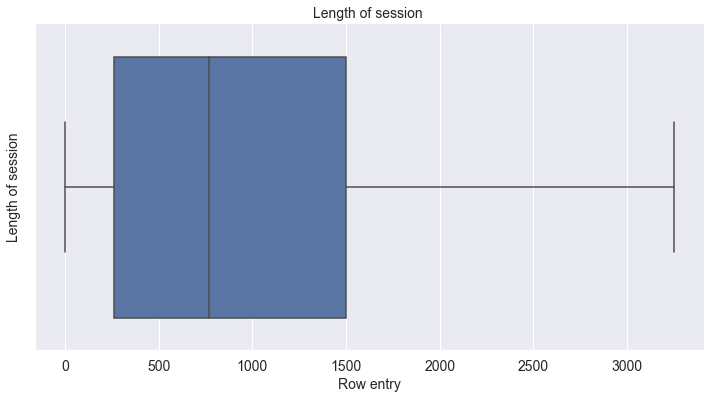

In [216]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=df[(df.length_of_session<3.25e3) & (df.length_of_session>0)].length_of_session.dropna())
plt.title("Length of session ", fontsize=14)
plt.xlabel('Row entry',fontsize=14)
plt.ylabel('Length of session',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

In [217]:
df_tmp = df[(df.length_of_session<3.25e3) & (df.length_of_session>0)]

tutors_sessions = pd.DataFrame({'number_of_sessions':df_tmp.groupby('tutor_id')['session_id'].count()})
tutors_sessions['length_of_session_avg'] = df_tmp.groupby('tutor_id')['length_of_session'].mean()
display(tutors_sessions)

,number_of_sessions,length_of_session_avg
tutor_id,,
2,1,206.529063
6,235,757.692038
10,275,1027.261282
12,601,1013.198940
18,343,744.585918
...,...,...
680521,68,1171.801130
694675,30,1188.840722
710855,23,1512.791954


In [223]:
students_sessions = pd.DataFrame({'number_of_sessions':df_tmp.groupby('student_id')['session_id'].count()})
students_sessions['length_of_session_avg'] = df_tmp.groupby('student_id')['length_of_session'].mean()
display(students_sessions)

,number_of_sessions,length_of_session_avg
student_id,,
52,2,198.847908
555,1,2123.768990
1157,2,654.046584
1269,3,1143.556904
2880,2,174.231891
...,...,...
745435,1,193.649275
745453,1,805.363415
745756,5,1719.075799


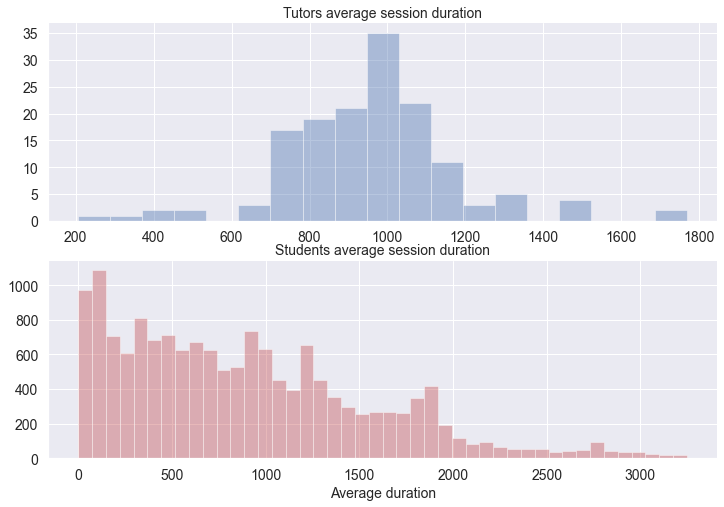

In [226]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.distplot(tutors_sessions.length_of_session_avg, kde=False)
plt.grid(True)
plt.title("Tutors average session duration", fontsize=14)
plt.xlabel('',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.subplot(2,1,2)
sns.distplot(students_sessions.length_of_session_avg, kde=False, color='r')
plt.grid(True)
plt.title("Students average session duration", fontsize=14)
plt.xlabel('Average duration',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()